In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-dataset/pubg_data.csv


# PROBLEM STATEMENT
**PUBG win Prediction:- Process of the predection that team will win or not  so it will be decided by the feature like          assits,heals,boosts,damagedealt,revieve,walking distance,swimdistance,headshot,matchtype,teamkills,etc.**

# INFO ABOUT DATASET
**groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.**



**matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.**


**assists - Number of enemy players this player damaged that were killed by teammates.**


****boosts - Number of boost items used.**


**damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.**


**DBNOs - Number of enemy players knocked.**


**headshotKills - Number of enemy players killed with headshots.**


**heals - Number of healing items used.**


**killPlace - Ranking in match of number of enemy players killed.**


**killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)**


**kills - Number of enemy players killed.**

**
**killStreaks - Max number of enemy players killed in a short amount of time.****


**longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.**


**maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.**


**numGroups - Number of groups we have data for in the match.**


**revives - Number of times this player revived teammates.**


**rideDistance - Total distance traveled in vehicles measured in meters**.


**roadKills - Number of kills while in a vehicle.**


**swimDistance - Total distance traveled by swimming measured in meters**.


**teamKills - Number of times this player killed a teammate.**


**vehicleDestroys - Number of vehicles destroyed.**


**walkDistance - Total distance traveled on foot measured in meters.**


**weaponsAcquired - Number of weapons picked up.**


**winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)******


# EDA

## DATA LOADING

In [3]:
#LOADING THE PUBG DATASET
data=pd.read_csv('../input/pubg-dataset/pubg_data.csv')
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,1
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,1
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,...,0,0.0000,0,0.00,0,0,49.75,2,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1048575 non-null  int64  
 1   Id               1048575 non-null  object 
 2   groupId          1048575 non-null  object 
 3   matchId          1048575 non-null  object 
 4   assists          1048575 non-null  int64  
 5   boosts           1048575 non-null  int64  
 6   damageDealt      1048575 non-null  float64
 7   DBNOs            1048575 non-null  int64  
 8   headshotKills    1048575 non-null  int64  
 9   heals            1048575 non-null  int64  
 10  killPlace        1048575 non-null  int64  
 11  killPoints       1048575 non-null  int64  
 12  kills            1048575 non-null  int64  
 13  killStreaks      1048575 non-null  int64  
 14  longestKill      1048575 non-null  float64
 15  matchDuration    1048575 non-null  int64  
 16  matchType        1

In [5]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [6]:
data.shape

(1048575, 30)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1048575, 30)

In [9]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2.331564e-01,1.107765e+00,1.308884e+02,6.586091e-01,2.269671e-01,1.368829e+00,4.760414e+01,5.060075e+02,9.255208e-01,...,1.644394e-01,6.073919e+02,3.498081e-03,4.512611e+00,2.397444e-02,7.865913e-03,1.155094e+03,3.660658e+00,6.077752e+02,4.558672e-01
std,3.026977e+05,5.884064e-01,1.716132e+00,1.713011e+02,1.147117e+00,5.990129e-01,2.676049e+00,2.747391e+01,6.276709e+02,1.560028e+00,...,4.705245e-01,1.498646e+03,7.382696e-02,3.048954e+01,1.685196e-01,9.216566e-02,1.184236e+03,2.457831e+00,7.399892e+02,4.980487e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.555000e+02,2.000000e+00,0.000000e+00,0.000000e+00
50%,5.242870e+05,0.000000e+00,0.000000e+00,8.433000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.861000e+02,3.000000e+00,0.000000e+00,0.000000e+00
75%,7.864305e+05,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,...,0.000000e+00,4.229500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,5.000000e+00,1.495000e+03,1.000000e+00
max,1.048574e+06,2.100000e+01,3.300000e+01,6.616000e+03,3.800000e+01,4.000000e+01,6.300000e+01,1.000000e+02,2.152000e+03,6.500000e+01,...,1.900000e+01,3.397000e+04,9.000000e+00,2.718000e+03,1.000000e+01,4.000000e+00,2.578000e+04,1.280000e+02,2.001000e+03,1.000000e+00


In [10]:
#for checking the dataset is balanced or not
data.winPlacePerc.value_counts()

0    570564
1    478011
Name: winPlacePerc, dtype: int64

## PERFORMING UNDERSAMPLING

<AxesSubplot:xlabel='winPlacePerc', ylabel='count'>

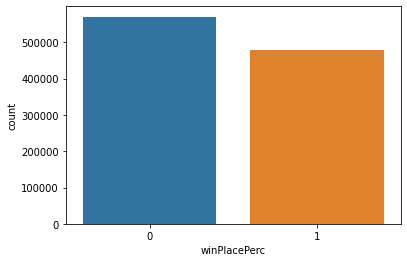

In [11]:
#visulizaing the LABEL
import seaborn as sns
sns.countplot(x='winPlacePerc',data=data)

In [12]:
mino_class=len(data[data['winPlacePerc']==1])
print(mino_class)

478011


In [13]:
majo_class_index=data[data['winPlacePerc']== 0].index
print(majo_class_index)

Int64Index([      0,       3,       4,       5,       6,       8,       9,
                 10,      11,      15,
            ...
            1048559, 1048560, 1048562, 1048566, 1048567, 1048568, 1048569,
            1048570, 1048573, 1048574],
           dtype='int64', length=570564)


In [14]:
mino_class_index=data[data['winPlacePerc']== 1].index

In [15]:
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
len(random_majority_indices)

478011

In [16]:
under_sample_indices=np.concatenate([mino_class_index,random_majority_indices])
len(under_sample_indices)

956022

In [17]:
df=data.loc[under_sample_indices]

In [18]:
df.winPlacePerc.value_counts()

1    478011
0    478011
Name: winPlacePerc, dtype: int64

## DATA PREPROCESSING:- FEATURE EXTRACTION

In [19]:
#DROPPING THE NOT IMPORTANT FEATURE
n_data=df.drop(['Unnamed: 0','Id','groupId','matchId'],axis=1)
n_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1,0,0,91.470,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,1
2,1,0,68.000,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.8,2,0,1
7,0,0,8.538,0,0,0,48,1000,0,0,...,0,2004.0000,0,0.00,0,0,1089.0,6,1500,1
12,0,0,0.000,0,0,0,37,0,0,0,...,0,6639.0000,0,0.00,0,0,2784.0,6,0,1
13,0,1,324.200,0,1,5,5,986,4,1,...,0,1228.0000,0,76.84,0,0,2050.0,6,1462,1


## DATA PREPROCESSING:- LABEL ENCODING

In [20]:
#CONVERTING CATEGORICAL VARIABLE IN TO NUMERICAL
from sklearn.preprocessing import LabelEncoder
label_model=LabelEncoder()
n_data['n_matchType']=label_model.fit_transform(n_data['matchType'])

In [21]:
#DROPPING THE CATEGORICAL COLUMN
n_data.drop('matchType',axis=1,inplace=True)

In [22]:
n_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,n_matchType
1,0,0,91.470,0,0,0,57,0,0,0,...,0.0045,0,11.04,0,0,1434.0,5,0,1,15
2,1,0,68.000,0,0,0,47,0,0,0,...,0.0000,0,0.00,0,0,161.8,2,0,1,2
7,0,0,8.538,0,0,0,48,1000,0,0,...,2004.0000,0,0.00,0,0,1089.0,6,1500,1,13
12,0,0,0.000,0,0,0,37,0,0,0,...,6639.0000,0,0.00,0,0,2784.0,6,0,1,15
13,0,1,324.200,0,1,5,5,986,4,1,...,1228.0000,0,76.84,0,0,2050.0,6,1462,1,13


# DATA VISULIZATION

## ASSIST

In [23]:
#CHECKING UNIQUE VALUE FOR THE ASSIST FEATURE
n_data.assists.unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 12, 21, 10, 11, 20, 14,
       17])

<AxesSubplot:xlabel='assists', ylabel='count'>

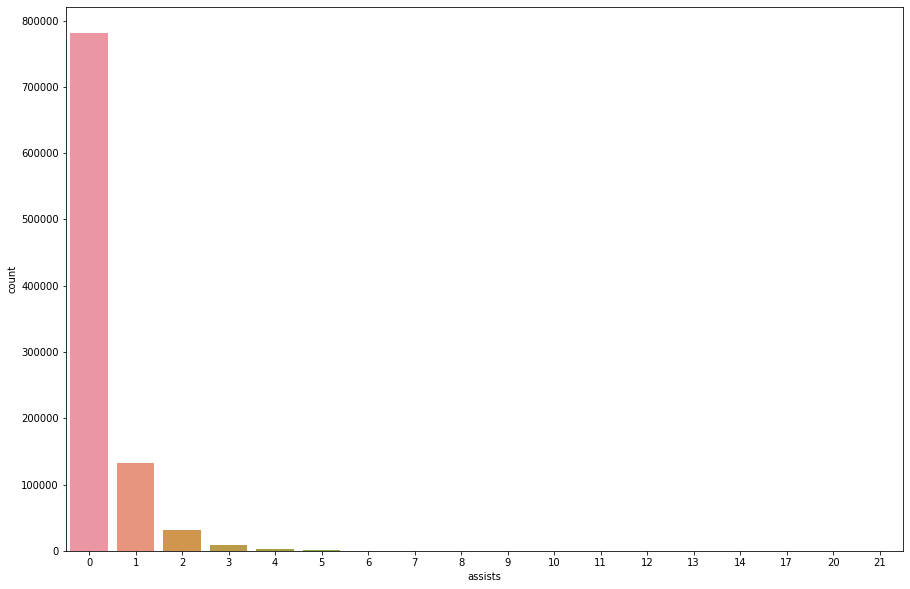

In [24]:
#CHECKING DISTRIBUTION OF THE ASSIST FEATURE
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x='assists',data=n_data)

## BOOSTS

In [26]:
#CHECKING UNIQUE VALUE FOR THE BOOSTS FEATURE
n_data.boosts.unique()

array([ 0,  1,  2,  3,  4,  6,  5,  9,  7,  8, 11, 10, 13, 14, 12, 21, 15,
       20, 16, 17, 33, 19, 18])

<AxesSubplot:xlabel='boosts', ylabel='count'>

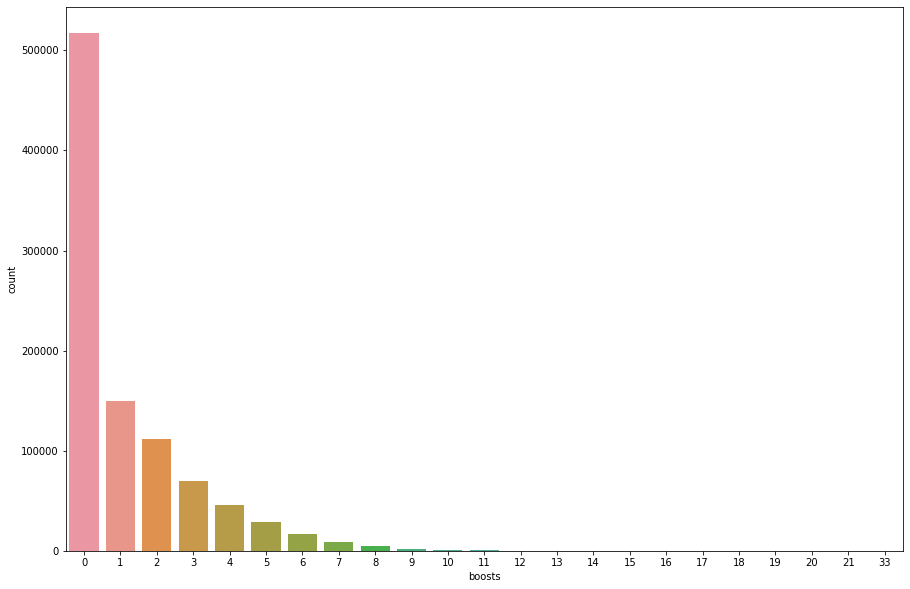

In [27]:
#CHECKING DISTRIBUTION OF THE BOOSTS FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='boosts',data=n_data)

## DAMAGEDEALT

In [29]:
n_data.damageDealt.unique()

array([91.47  , 68.    ,  8.538 , ...,  4.447 ,  0.1392,  8.145 ])

<AxesSubplot:xlabel='damageDealt', ylabel='Count'>

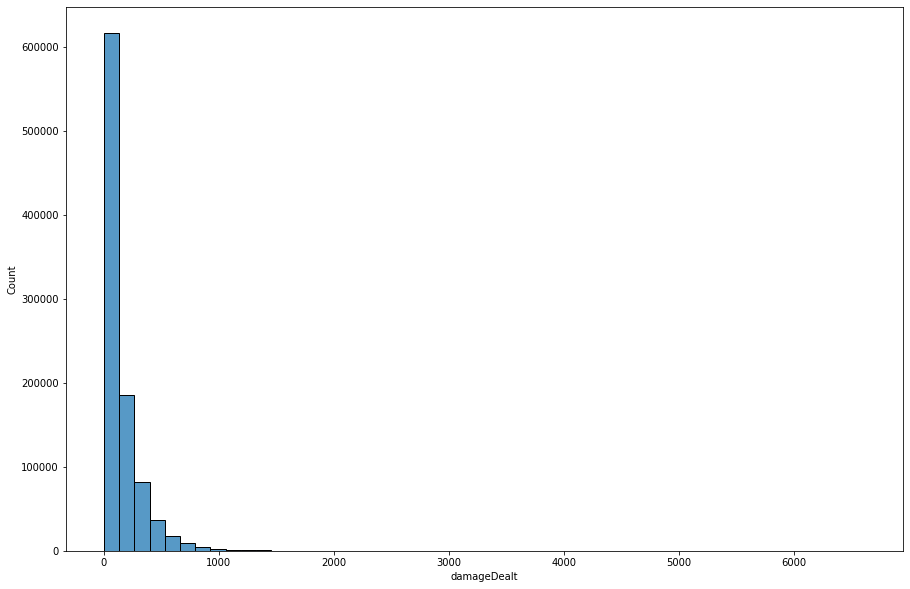

In [30]:
#CHECKING DISTRIBUTION OF THE DAMAGEDEALT FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='damageDealt',data=n_data,bins=50)

## DBNOs

In [32]:
n_data.DBNOs.unique()

array([ 0,  1,  6,  4,  3,  2,  5, 10,  8,  7,  9, 13, 21, 12, 11, 32, 18,
       24, 22, 20, 14, 15, 26, 17, 16, 25, 27, 23, 19, 33, 30, 38])

<AxesSubplot:xlabel='DBNOs', ylabel='count'>

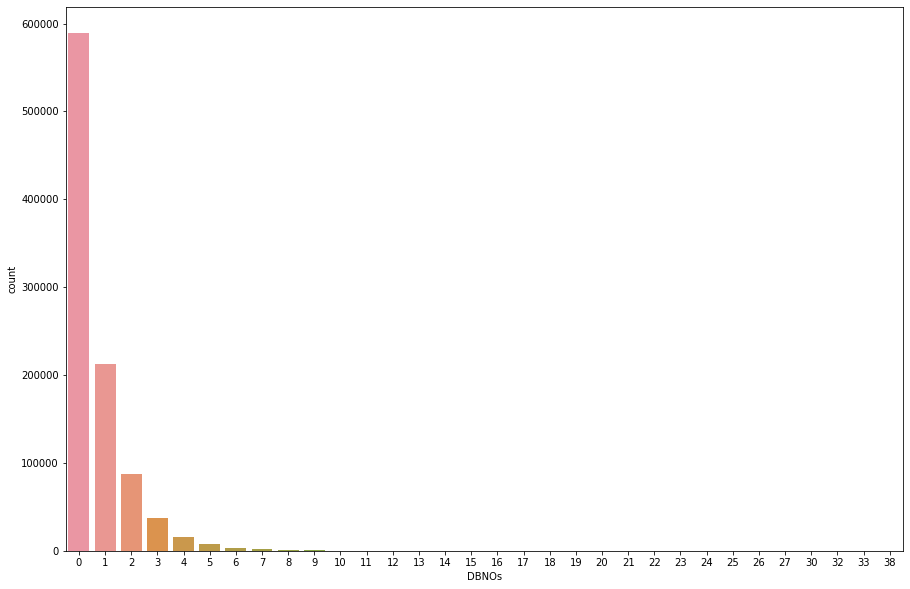

In [33]:
#CHECKING DISTRIBUTION OF THE DBNOs FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='DBNOs',data=n_data)

## HEADSHOTKILL

In [35]:
n_data.headshotKills.unique()

array([ 0,  1,  2,  3,  6,  4,  5,  8,  9,  7, 17, 10, 14, 12, 40, 11, 13,
       15, 16, 18, 27, 19])

<AxesSubplot:xlabel='headshotKills', ylabel='count'>

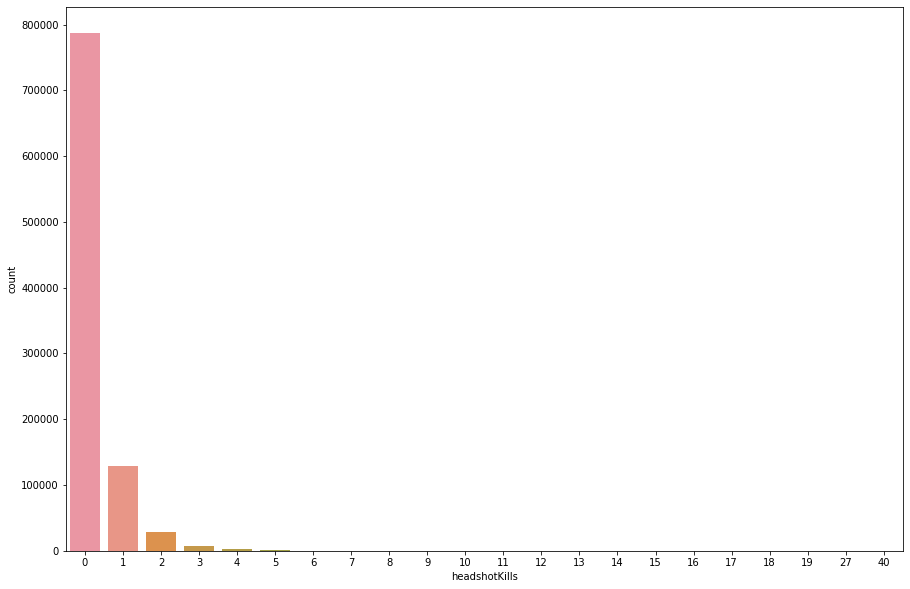

In [36]:
#CHECKING DISTRIBUTION OF THE headshotKills FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='headshotKills',data=n_data)

## HEALS

In [38]:
n_data.heals.unique()

array([ 0,  5,  2, 14, 12,  1,  8,  3,  4,  6,  9, 13,  7, 24, 10, 15, 25,
       11, 18, 17, 20, 16, 29, 23, 19, 21, 22, 27, 28, 32, 47, 26, 31, 30,
       43, 33, 37, 34, 38, 52, 35, 42, 48, 40, 41, 44, 39, 45, 36, 61, 46,
       57, 63])

<AxesSubplot:xlabel='heals', ylabel='count'>

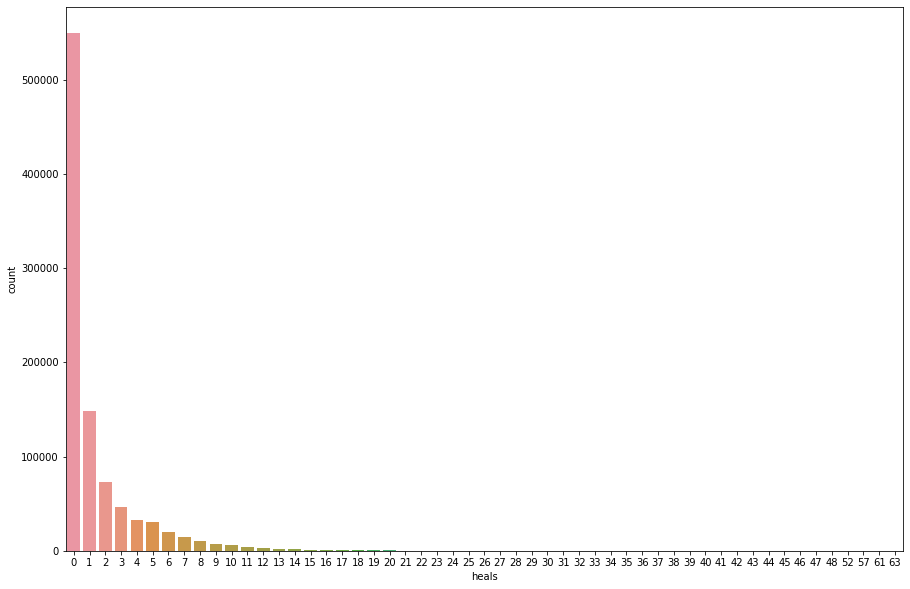

In [39]:
#CHECKING DISTRIBUTION OF THE heals FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='heals',data=n_data)

## KILLPLACE

In [41]:
n_data.killPlace.unique()

array([ 57,  47,  48,  37,   5,  25,  13,  18,  15,   2,   3,  11,   7,
         6,  61,  24,  27,   4,  29,  16,   8,  55,  49,  12,  54,  23,
        10,  40,  50,  38,  58,  45,  31,  30,  28,  26,  51,  44,  64,
        46,  59,  53,  33,   9,  62,  56,  21,  43,  36,   1,  35,  20,
        17,  22,  39,  32,  34,  41,  52,  14,  42,  19,  60,  65,  63,
        66,  67,  68,  71,  69,  70,  73,  72,  74,  92,  86,  77,  78,
        83,  85,  84,  76,  82,  87,  75,  81,  94,  89,  90,  95,  88,
        80,  93,  91,  96,  79,  98,  97,  99, 100])

<AxesSubplot:xlabel='killPlace', ylabel='Count'>

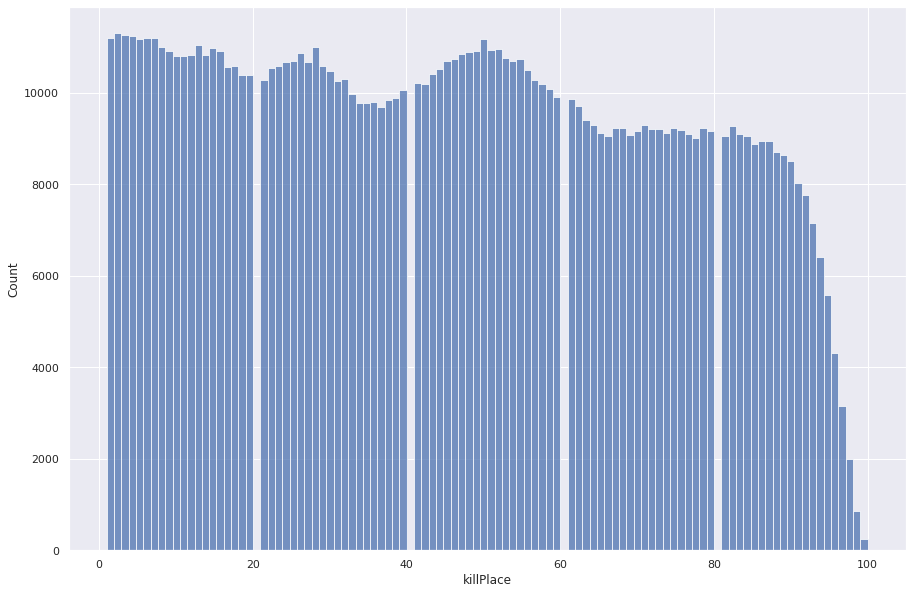

In [222]:
#CHECKING DISTRIBUTION OF THE killPlace FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='killPlace',data=n_data)

## KILLPOINTS

In [44]:
n_data.killPoints.unique()

array([   0, 1000,  986, ...,  261,  258,  823])

<AxesSubplot:xlabel='killPoints', ylabel='Count'>

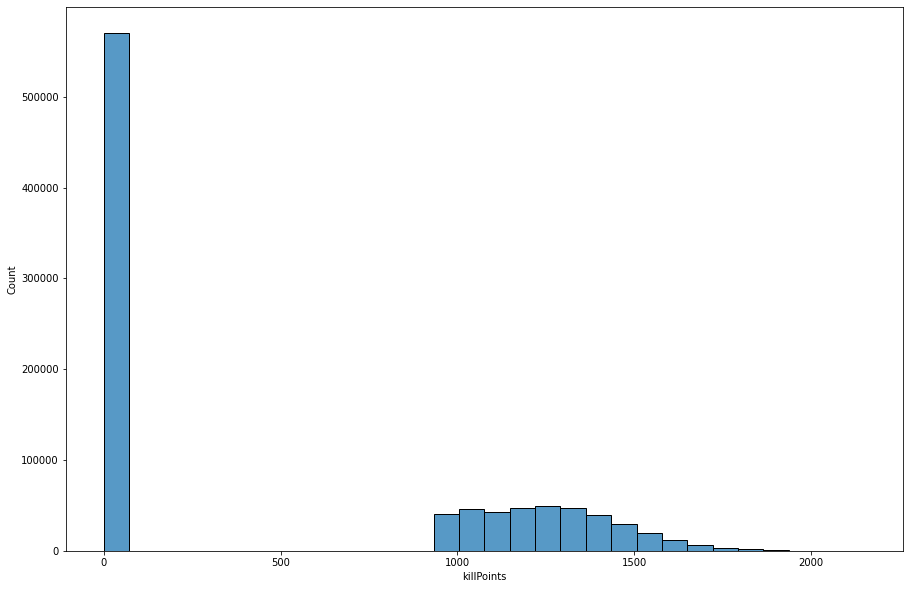

In [45]:
#CHECKING DISTRIBUTION OF THE killPoints FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='killPoints',data=n_data,bins=30)

## KILLS

In [47]:
n_data.kills.unique()

array([ 0,  4,  1,  2,  9,  3,  5,  6,  8,  7, 14, 13, 15, 12, 21, 11, 10,
       17, 20, 24, 18, 16, 22, 19, 23, 35, 31, 27, 25, 48, 42, 30, 26, 65,
       39, 33, 28, 29, 57, 55, 56, 34, 36, 38, 37, 44])

<AxesSubplot:xlabel='kills', ylabel='count'>

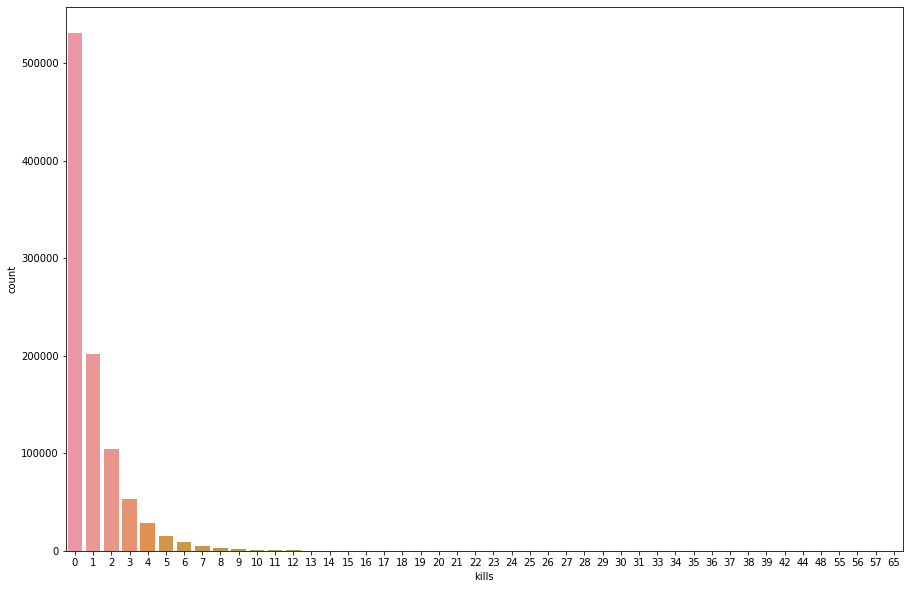

In [48]:
#CHECKING DISTRIBUTION OF THE kills FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='kills',data=n_data)

## KILLSTREAK

In [50]:
n_data.killStreaks.unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7, 14,  8, 11, 10, 12,  9])

<AxesSubplot:xlabel='killStreaks', ylabel='count'>

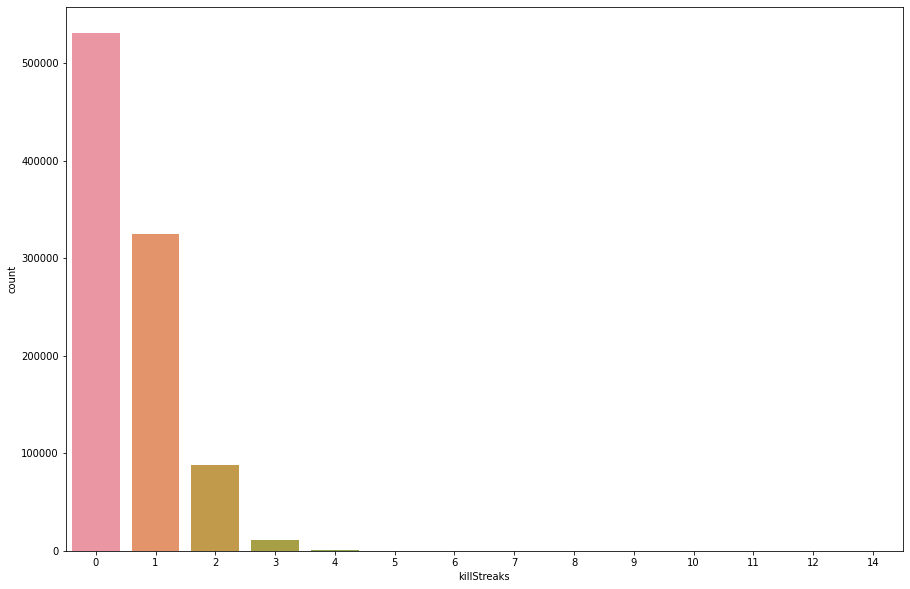

In [51]:
#CHECKING DISTRIBUTION OF THE killStreaks FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='killStreaks',data=n_data)

## LONGESTKILL

In [53]:
n_data.longestKill.unique()

array([ 0.    , 49.83  , 37.91  , ...,  0.693 ,  0.6674,  0.6819])

<AxesSubplot:xlabel='longestKill', ylabel='Count'>

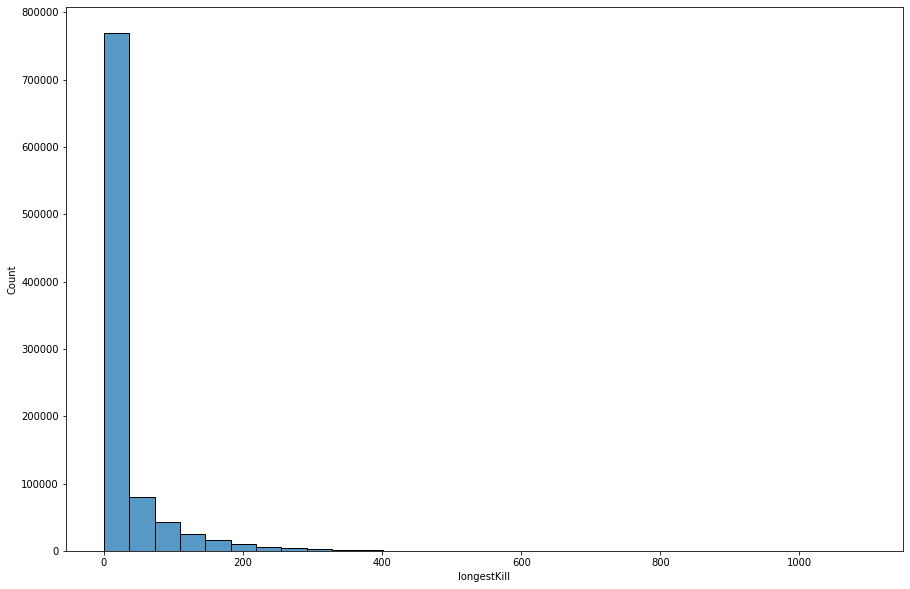

In [54]:
#CHECKING DISTRIBUTION OF THE longestKill FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='longestKill',data=n_data,bins=30)

<AxesSubplot:xlabel='winPlacePerc', ylabel='killStreaks'>

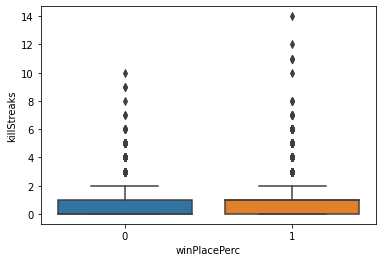

In [55]:
sns.boxplot(x='winPlacePerc',y='longestKill',data=n_data)

## MATCHDURATION

In [56]:
n_data.matchDuration.unique()

array([1777, 1318, 1967, ..., 1035,  522,  992])

<AxesSubplot:xlabel='matchDuration', ylabel='Count'>

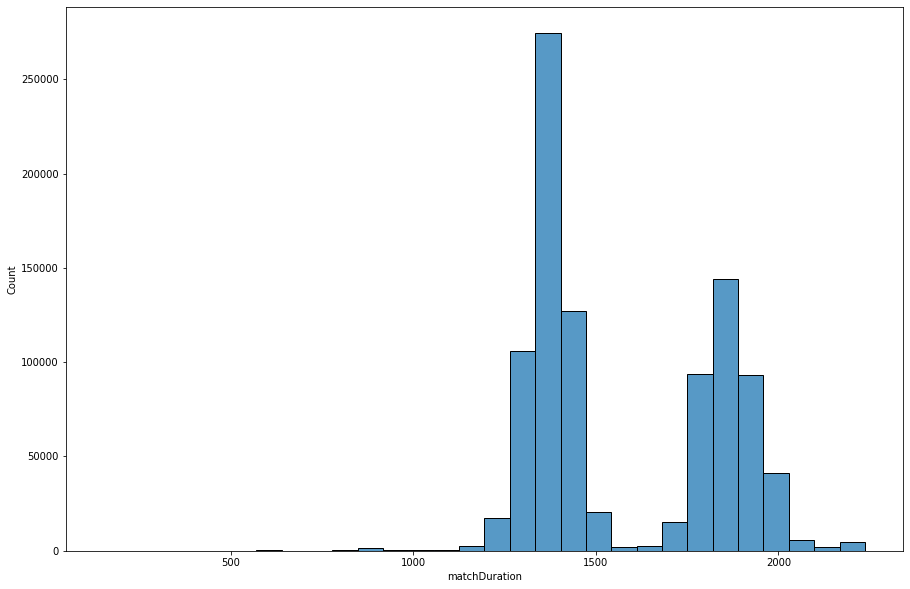

In [57]:
#CHECKING DISTRIBUTION OF THE matchDuration FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='matchDuration',data=n_data,bins=30)

## MAXPLACE

In [59]:
n_data.maxPlace.unique()

array([ 26,  50,  96,  29,  97,  31,  27,  30,  48,  49,  47,  28,  92,
        95,  45,  25,  94,  93,  32,  46,  91,  98,  16, 100,  40,  78,
        99,  44,  51,  86,  34,  85,  22,  21,  88,   8,  89,  43,  23,
        24,  90,  15,  33,  12,  42,  73,  84,   7,  83,  54,  20,  80,
        87,  19,  74,  35,  10,  11,  18,  41,  37,  63,  67,  14,  39,
        13,  38,  57,  81,  82,  70,  64,  36,   6,  79,  66,  17,  55,
        60,   4,  75,  69,  68,   5,   9,  77,  62,  52,   2,  61,  76,
        65,  56,  72,  71,  58,   3,  53,  59])

<AxesSubplot:xlabel='maxPlace', ylabel='Count'>

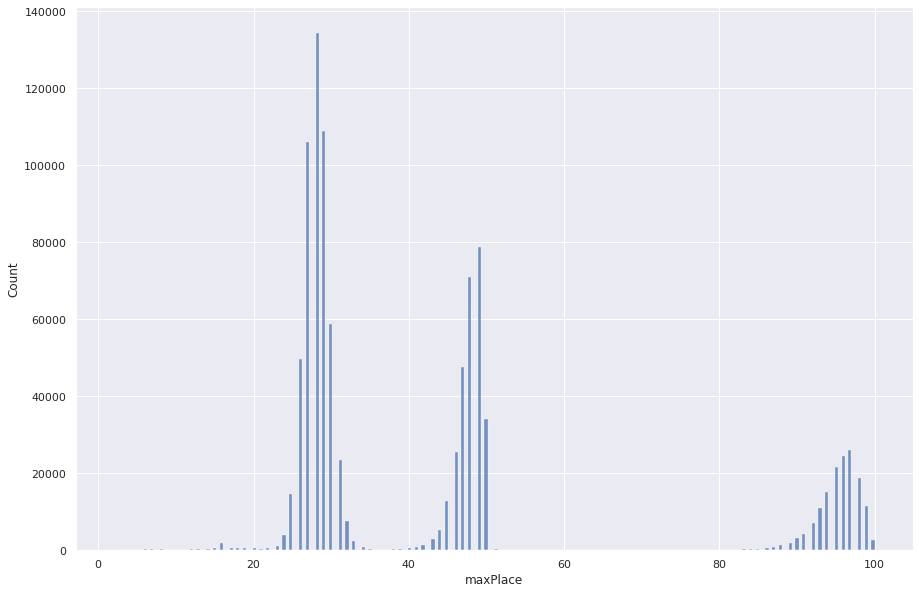

In [223]:
#CHECKING DISTRIBUTION OF THE maxPlace FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='maxPlace',data=n_data)

## NUMGROUPS

In [62]:
n_data.numGroups.unique()

array([ 25,  47,  92,  28,  94,  30,  26,  95,  48,  45,  27,  46,  89,
        93,  42,  23,  44,  31,  50,  29,  88,  96,  85,  49,  97,  43,
        79,  16,  98,  24,  32,  40,  73,  91,  90,  77,  84,  83,  20,
        41,  87,  78,   8,  39,  13, 100,  22,  19,  21,  33,  99,  12,
        64,  70,   7,  80,  53,  34,   2,  15,  76,  86,  58,  35,  10,
        11,  18,  38,  14,  37,  36,  74,  56,   9,  71,  81,  65,  63,
        82,  75,   6,  72,  61,  60,   4,  67,  17,   5,  68,  52,  69,
        51,  54,  59,  57,   3,  66,  55,  62,   1])

<AxesSubplot:xlabel='numGroups', ylabel='Count'>

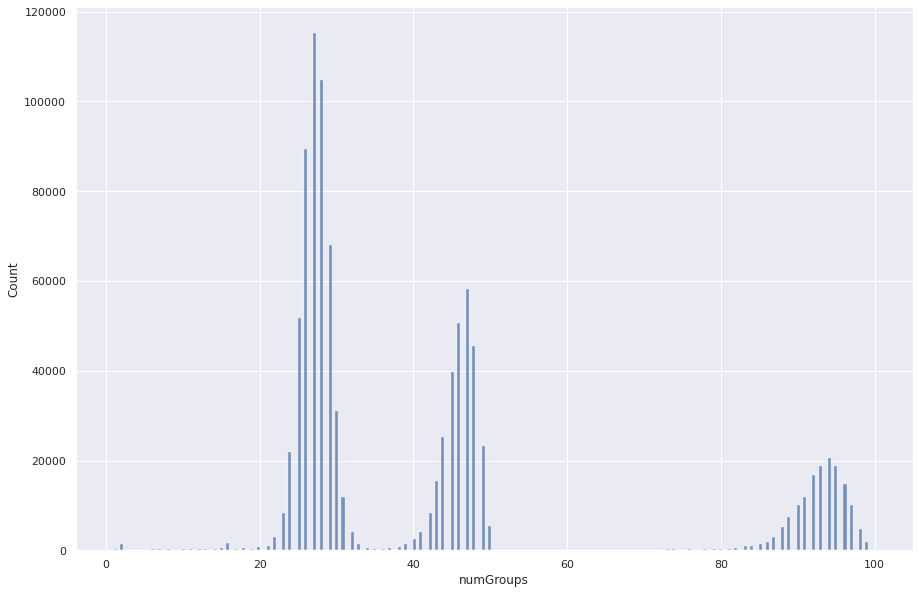

In [224]:
#CHECKING DISTRIBUTION OF THE numGroups FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='numGroups',data=n_data)

## RANKPOINTS

In [65]:
n_data.rankPoints.unique()

array([1484, 1491,   -1, ..., 2696, 2797,  863])

<AxesSubplot:xlabel='rankPoints', ylabel='Count'>

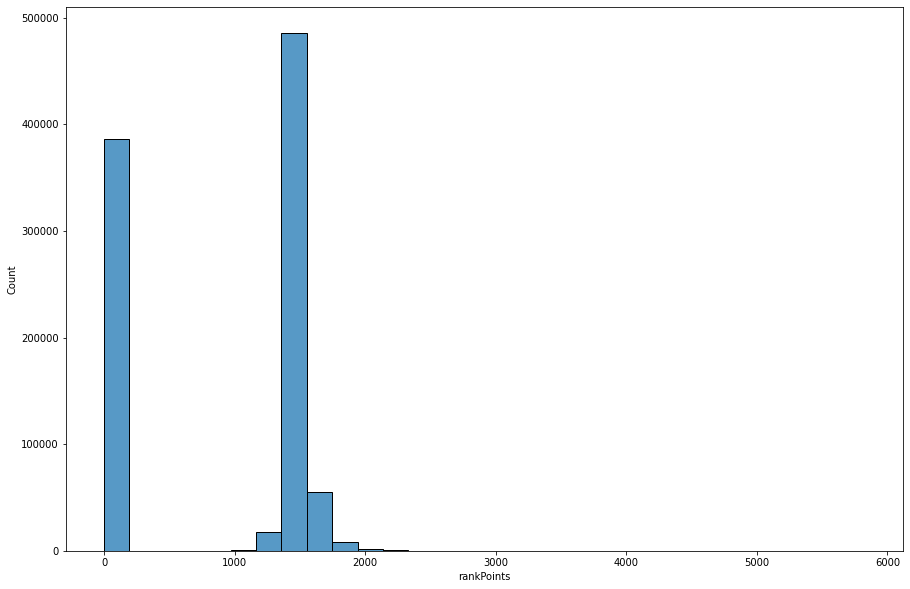

In [66]:
#CHECKING DISTRIBUTION OF THE rankPoints FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='rankPoints',data=n_data,bins=30)

## REVIVES

In [68]:
n_data.revives.unique()

array([ 0,  1,  3,  2,  4,  5,  6,  8,  9, 11,  7, 17, 16, 13, 12, 14, 10,
       18, 15, 19])

<AxesSubplot:xlabel='revives', ylabel='count'>

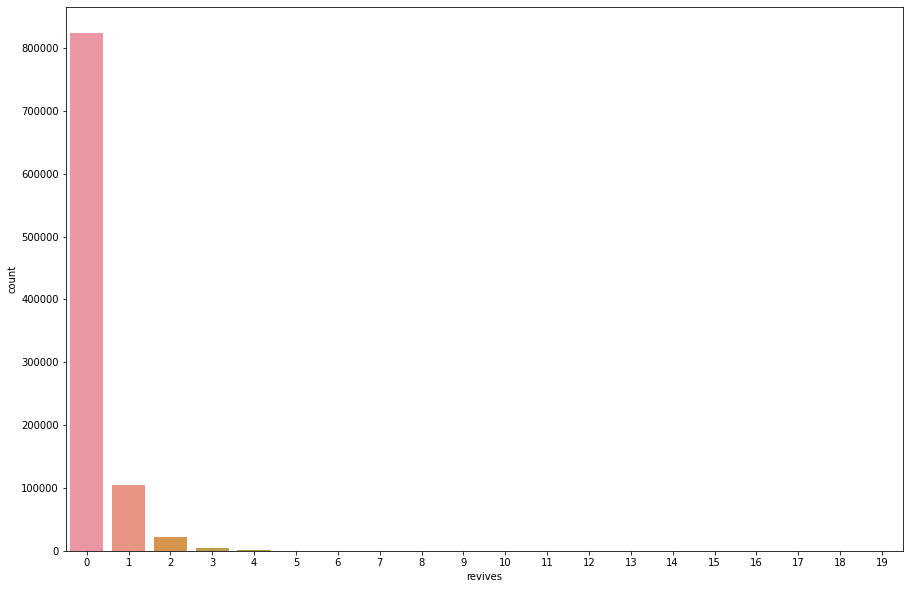

In [69]:
#CHECKING DISTRIBUTION OF THE revives FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='revives',data=n_data)

## RIDEDISTANCE

In [71]:
n_data.rideDistance.unique()

array([4.500e-03, 0.000e+00, 2.004e+03, ..., 3.747e+01, 3.509e+01,
       1.527e+04])

<AxesSubplot:xlabel='rideDistance', ylabel='Count'>

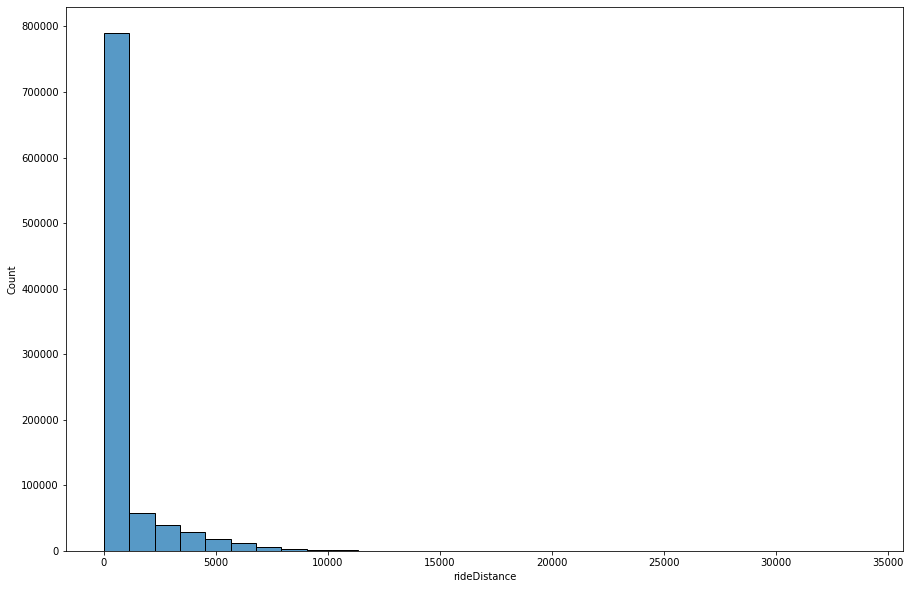

In [72]:
#CHECKING DISTRIBUTION OF THE rideDistance FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='rideDistance',data=n_data,bins=30)

## ROADKILLS

In [74]:
n_data.roadKills.unique()

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9])

<AxesSubplot:xlabel='roadKills', ylabel='count'>

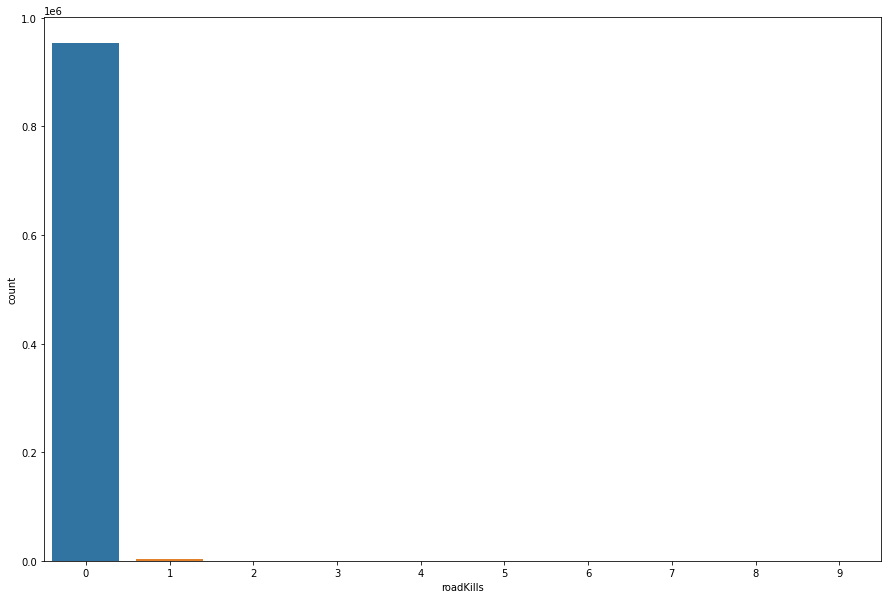

In [75]:
#CHECKING DISTRIBUTION OF THE roadKills FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='roadKills',data=n_data)

## SWIMDISTANCE

In [77]:
n_data.swimDistance.unique()

array([11.04  ,  0.    , 76.84  , ...,  5.051 ,  4.44  ,  0.8702])

<AxesSubplot:xlabel='swimDistance', ylabel='Count'>

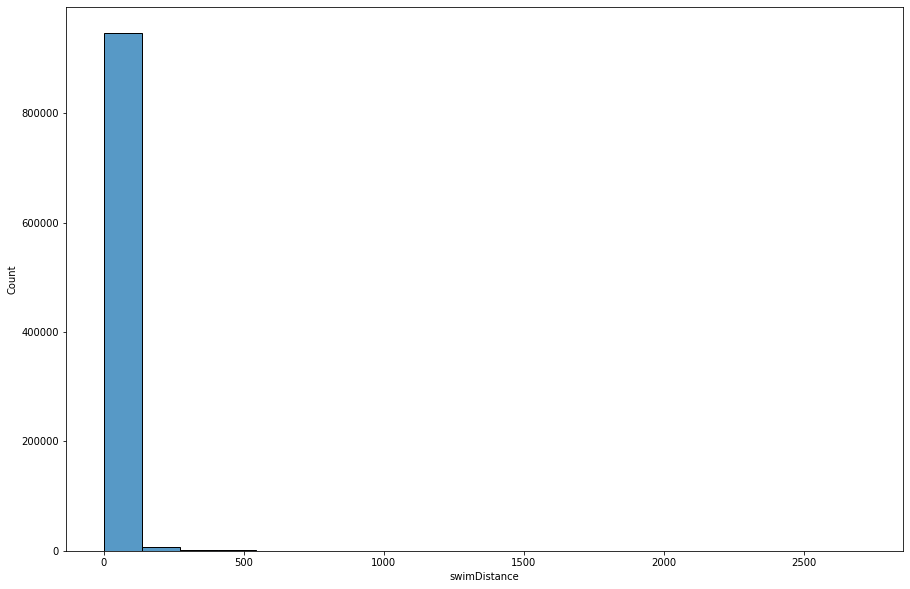

In [78]:
#CHECKING DISTRIBUTION OF THE swimDistance FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='swimDistance',data=n_data,bins=20)

## TEAMKILLS

In [80]:
n_data.teamKills.unique()

array([ 0,  1,  2,  3,  4,  5, 10])

<AxesSubplot:xlabel='teamKills', ylabel='count'>

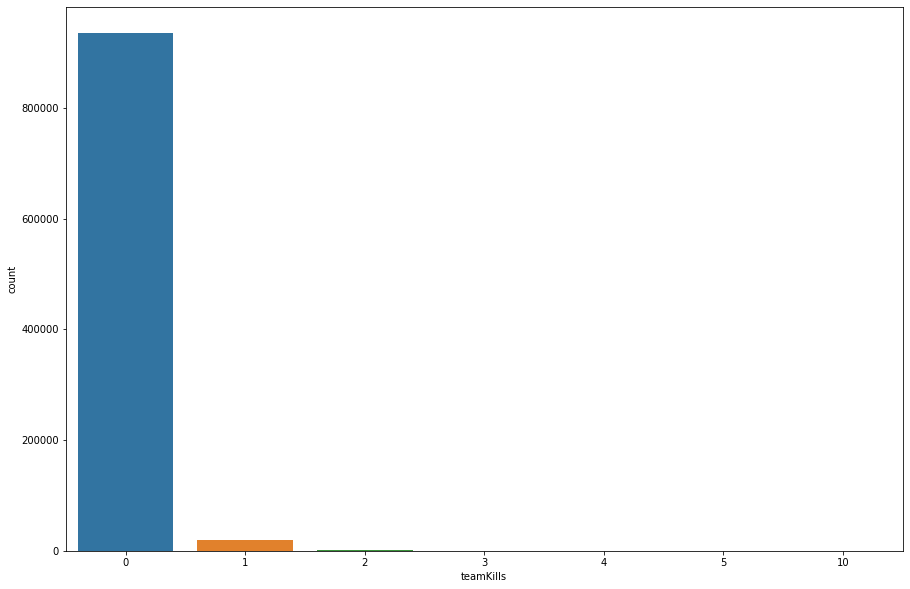

In [81]:
#CHECKING DISTRIBUTION OF THE teamKills FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='teamKills',data=n_data)

## VEHICLEDESTROYS

In [83]:
n_data.vehicleDestroys.unique()

array([0, 1, 2, 3, 4])

<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

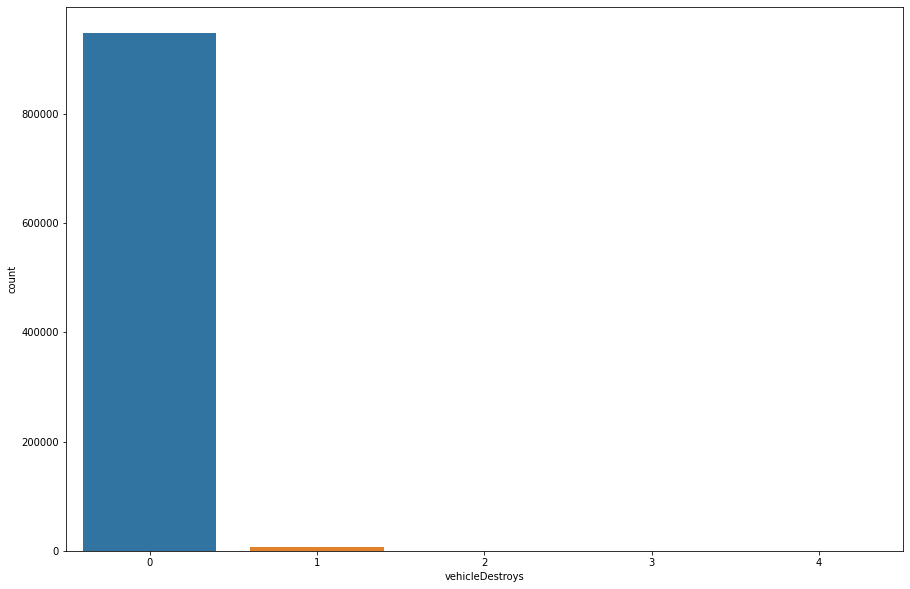

In [84]:
#CHECKING DISTRIBUTION OF THE vehicleDestroys FEATURE
plt.figure(figsize=(15,10))
sns.countplot(x='vehicleDestroys',data=n_data)

## WALKDISTANCE

In [86]:
n_data.walkDistance.unique()

array([1434.   ,  161.8  , 1089.   , ...,    9.643,    9.689,    6.007])

<AxesSubplot:xlabel='walkDistance', ylabel='Count'>

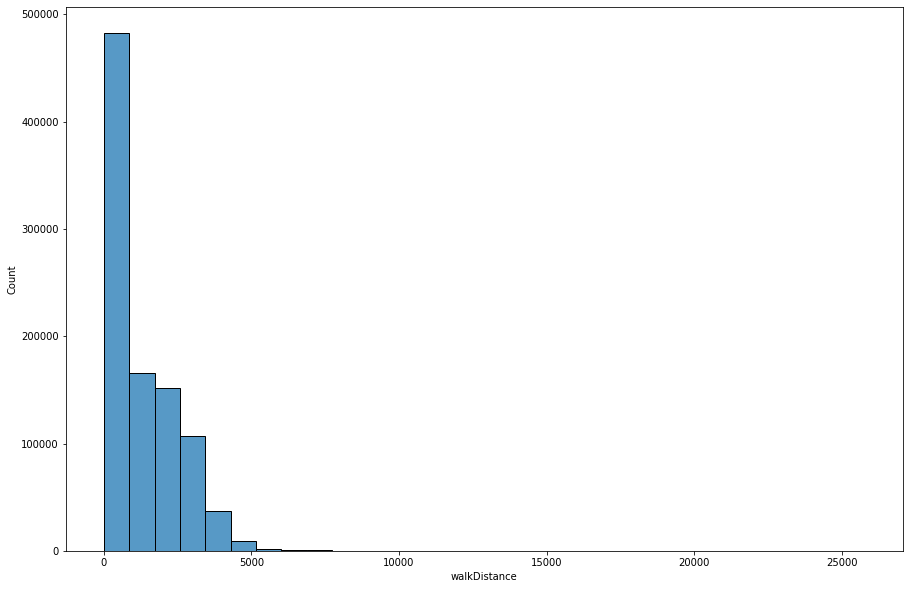

In [87]:
#CHECKING DISTRIBUTION OF THE walkDistance FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='walkDistance',data=n_data,bins=30)

## WEAPONSACQUIRED

In [89]:
n_data.weaponsAcquired.unique()

array([  5,   2,   6,   7,   3,   4,   8,   1,   9,  11,  10,   0,  13,
        14,  43,  12,  28,  21,  15,  22,  16,  18,  25,  26,  19,  23,
        20,  17,  30,  38,  24,  34,  33,  29,  52,  48,  36,  46,  27,
        44,  37,  45,  63,  71,  31,  35,  61,  55,  41,  72,  67,  40,
        50, 128,  39,  53,  47,  60,  42,  59,  32,  70,  51,  80,  64,
        49,  56,  65,  66,  54,  77,  68,  62])

<AxesSubplot:xlabel='weaponsAcquired', ylabel='Count'>

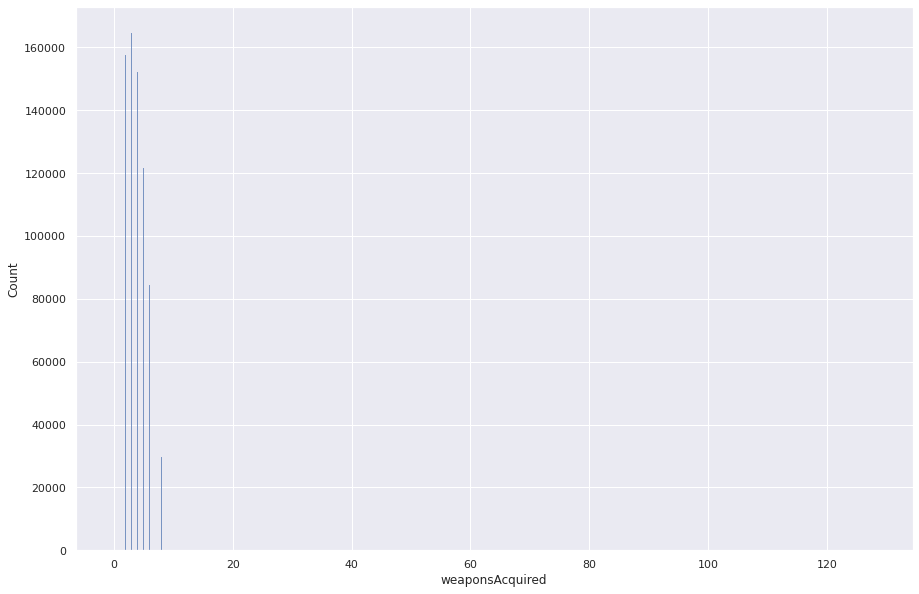

In [225]:
#CHECKING DISTRIBUTION OF THE weaponsAcquired FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='weaponsAcquired',data=n_data)

## WINPOINTS

In [92]:
n_data.winPoints.unique()

array([   0, 1500, 1462, ...,  776,  807,  896])

<AxesSubplot:xlabel='winPoints', ylabel='Count'>

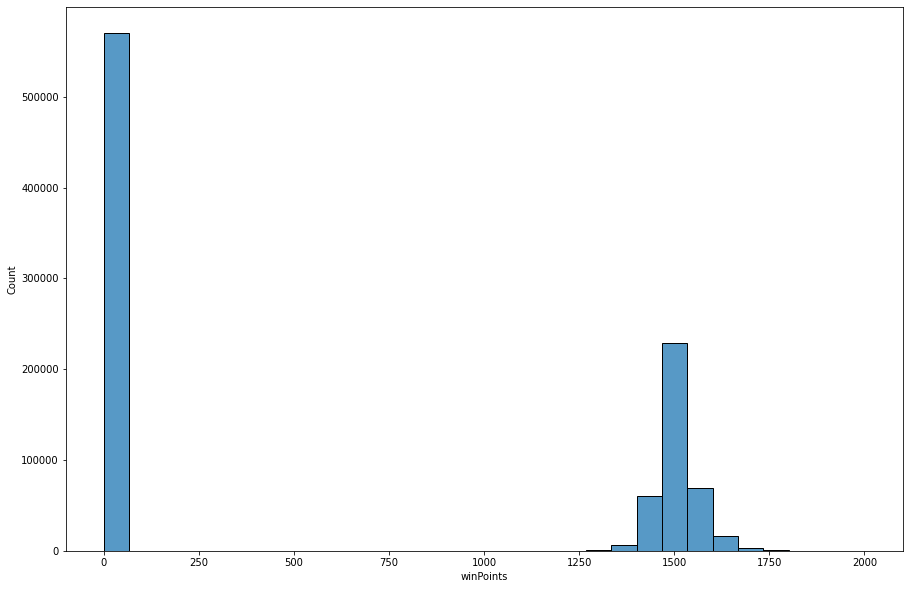

In [93]:
#CHECKING DISTRIBUTION OF THE  winPoints FEATURE
plt.figure(figsize=(15,10))
sns.histplot(x='winPoints',data=n_data,bins=30)

In [95]:
n_data.winPlacePerc.value_counts()

1    478011
0    478011
Name: winPlacePerc, dtype: int64

# CORRELATION MATRIX


**FINDING THE CORELATION BETWEEN FEATURES AND LABEL**

<AxesSubplot:>

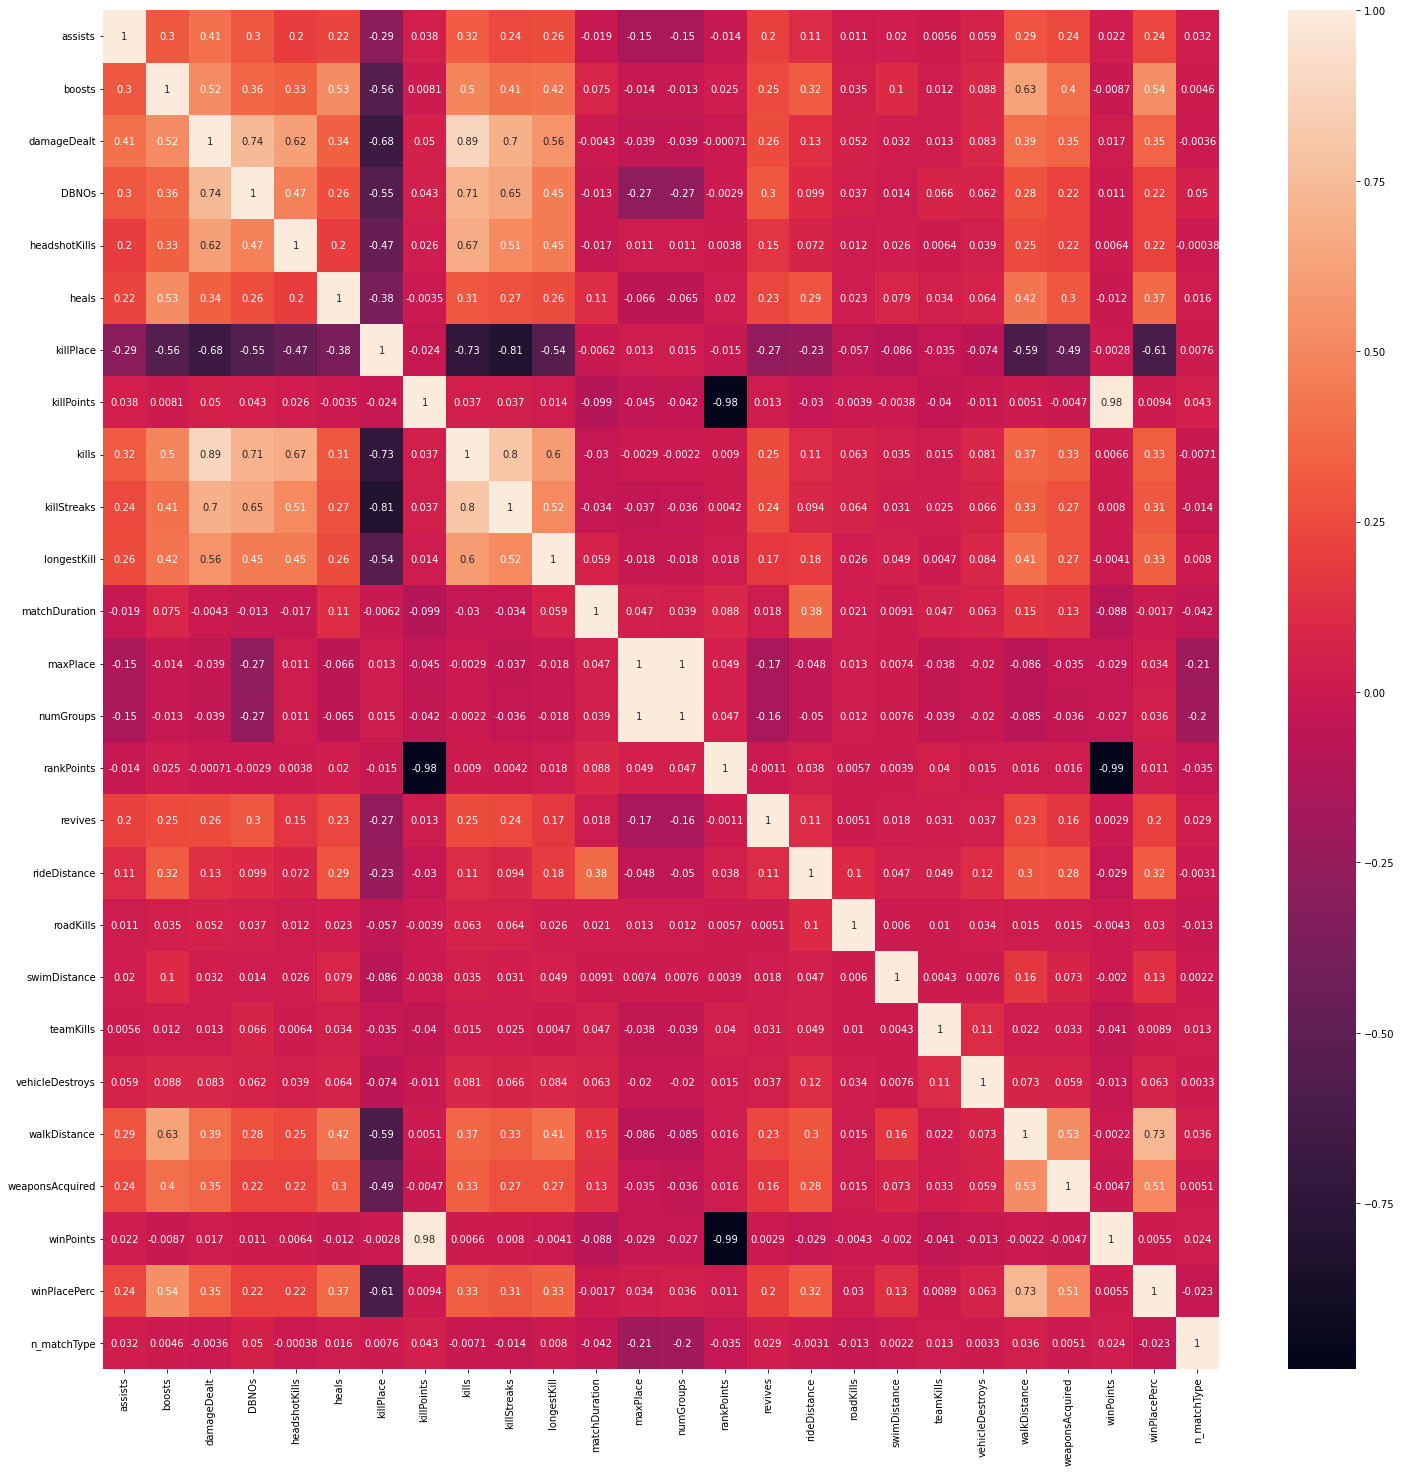

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(n_data.corr(),annot=True)

# IMPORTANT FEATURES
> **1.ASSITS(0.24)**

> **2.Boosts(0.55)**

> **3.DamageDealt(0.36)**

> **4.DBNOs(0.22)**

> **5.headshotkills(0.22)**

> **6.Heals(0.38)**

> **7.Kills(0.34)**

> **8.Killstreak(0.31)**

> **9.Longestkill(0.34)**

>  **10.Revievs(0.2)**

> **11.Ridedistance(0.33)**

> **12.Swimdistance(0.14)**

> **13.Walkdistance(0.74)**

> **14.Weponacquired(0.51)**



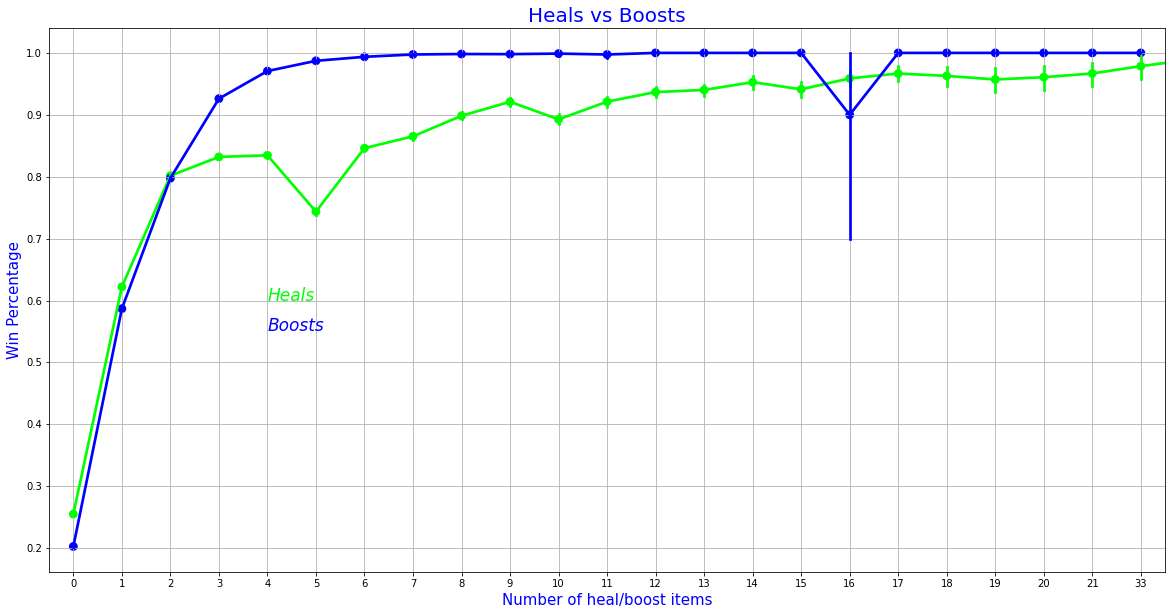

In [99]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [102]:
solos = n_data[n_data['numGroups']>50]
duos = n_data[(n_data['numGroups']>25) & (n_data['numGroups']<=50)]
squads = n_data[n_data['numGroups']<=25]

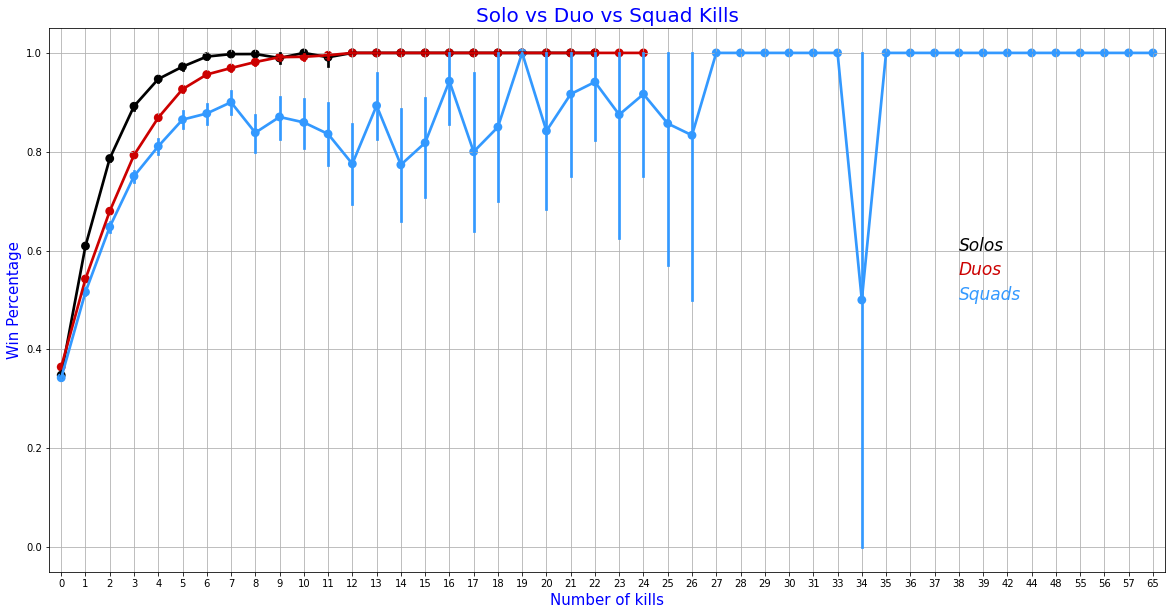

In [103]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

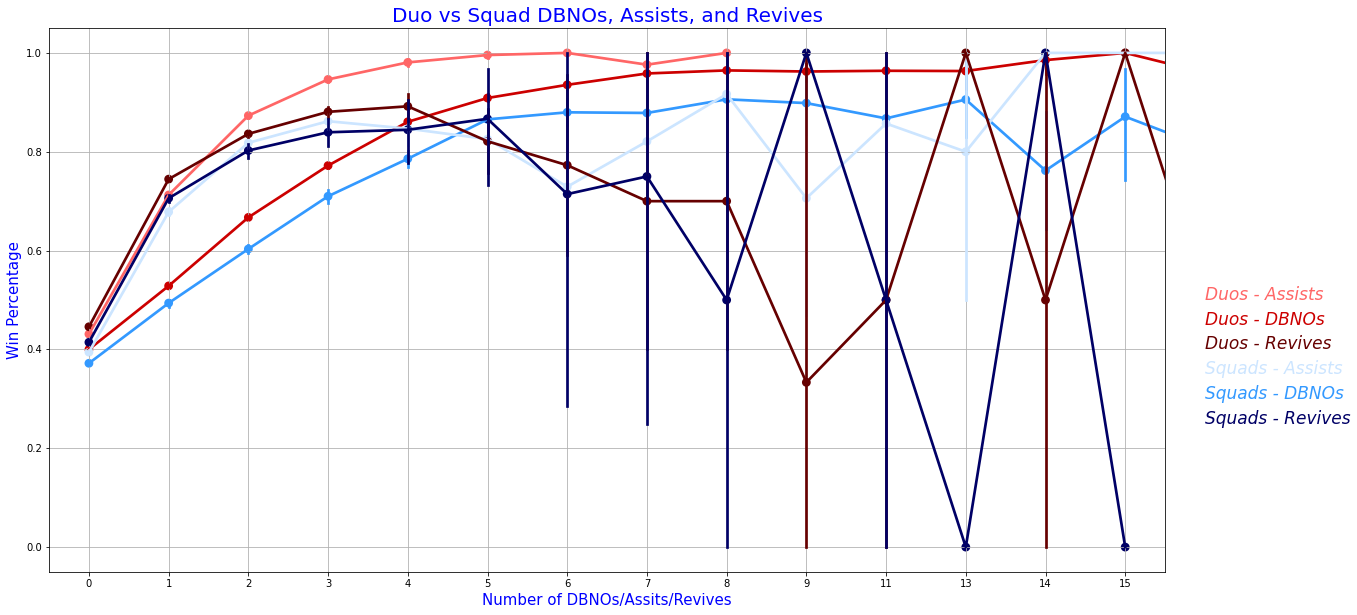

In [104]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [105]:
#cols = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','kills','killStreaks','longestKill','revives','rideDistance','swimDistance','walkDistance','weaponsAcquired','winPlacePerc']
#sns.pairplot(n_data[cols], height = 2.5)
#plt.show()

In [106]:
features=n_data.drop(['killPlace','killPoints','matchDuration','maxPlace','numGroups','n_matchType','rankPoints','roadKills','teamKills','vehicleDestroys','winPoints','winPlacePerc'],axis=1).values
features

array([[0.000e+00, 0.000e+00, 9.147e+01, ..., 1.104e+01, 1.434e+03,
        5.000e+00],
       [1.000e+00, 0.000e+00, 6.800e+01, ..., 0.000e+00, 1.618e+02,
        2.000e+00],
       [0.000e+00, 0.000e+00, 8.538e+00, ..., 0.000e+00, 1.089e+03,
        6.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 2.592e+01, ..., 0.000e+00, 4.124e+02,
        2.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.846e+01,
        1.000e+00],
       [0.000e+00, 0.000e+00, 6.480e+00, ..., 0.000e+00, 2.228e+01,
        0.000e+00]])

In [107]:
label=n_data['winPlacePerc'].values
label

array([1, 1, 1, ..., 0, 0, 0])

# TRAIN_TEST_SPLIT

In [108]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(features,label,test_size=0.3)

# STANDARSCALAR

In [109]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
X_train_std_features=std_model.fit_transform(X_train)
X_test_std_features=std_model.transform(X_test)

In [110]:
X_train.shape

(669215, 14)

In [111]:
X_test.shape

(286807, 14)

In [112]:
y_train.shape

(669215,)

# MODEL BUILDING: SVM

In [113]:
from sklearn import svm
SVM_model = svm.SVC()

In [114]:
SVM_model.fit(X_train_std_features,y_train)

SVC()

In [115]:
y_predicted_SVM = SVM_model.predict(X_test_std_features)

In [116]:
SVM_model.score(X_test_std_features,y_test)

0.889253051703759

In [156]:
print("Precision:",metrics.precision_score(y_test, y_predicted_SVM))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM))

Precision: 0.898326219707712
Recall: 0.8781466363902317


# MODEL BUILDING: LOGISTIC

In [117]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [118]:
logistic_model.fit(X_train_std_features,y_train)

LogisticRegression()

In [119]:
y_predicted_Logistic = logistic_model.predict(X_test_std_features)

In [120]:
logistic_model.score(X_test_std_features,y_test)

0.8874887990878884

In [121]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_Logistic))
print("Precision:",metrics.precision_score(y_test, y_predicted_Logistic))
print("Recall:",metrics.recall_score(y_test, y_predicted_Logistic))

Accuracy: 0.8874887990878884
Precision: 0.9071354886854985
Recall: 0.8636445955170444


# MODEL BUILDING: KNeighborsClassifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train_std_features, y_train)

KNeighborsClassifier()

In [123]:
y_predicted_KNN = KNN_model.predict(X_test_std_features) 

In [124]:
KNN_model.score(X_test_std_features,y_test)

0.8757073572123414

In [154]:
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN ))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Precision: 0.8810610019632491
Recall: 0.869007982391374


# MODEL BUILDING: GaussianNB

In [125]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(X_train_std_features, y_train)

GaussianNB()

In [126]:
y_predicted_naive = naive_bayes_model.predict(X_test_std_features)

In [127]:
naive_bayes_model.score(X_test_std_features,y_test)

0.8247113912840343

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test, y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.8247113912840343
Precision: 0.881912263177717
Recall: 0.7502821002187148


# MODEL BUILDING: DecisionTreeClassifier

In [129]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(X_train_std_features, y_train)

DecisionTreeClassifier()

In [130]:
y_predicted_deseciontree = deseciontree_model.predict(X_test_std_features)

In [131]:
deseciontree_model.score(X_test_std_features,y_test)

0.8354398602544568

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test, y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.8354398602544568
Precision: 0.8400386724345992
Recall: 0.8291378181463578


#  MODEL BUILDING: RandomForestClassifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(X_train_std_features, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [134]:
y_predicted_randomforest = randomforest_model.predict(X_test_std_features)

In [135]:
randomforest_model.score(X_test_std_features,y_test)

0.8725310051707246

In [136]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test, y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8725310051707246
Precision: 0.8830845236816669
Recall: 0.8590891993926139


#  MODEL BUILDING: AdaBoostClassifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier_model= AdaBoostClassifier(n_estimators=100, random_state=0)

In [140]:
AdaBoostClassifier_model.fit(X_train_std_features,y_train )

AdaBoostClassifier(n_estimators=100, random_state=0)

In [142]:
y_predicted_AdaBoostClassifier_model=AdaBoostClassifier_model.predict(X_test_std_features)

In [143]:
AdaBoostClassifier_model.score(X_test_std_features,y_test)

0.8884824986837838

In [151]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_AdaBoostClassifier_model))
print("Precision:",metrics.precision_score(y_test, y_predicted_AdaBoostClassifier_model))
print("Recall:",metrics.recall_score(y_test, y_predicted_AdaBoostClassifier_model))

Accuracy: 0.8884824986837838
Precision: 0.8951651745240253
Recall: 0.8803128874524608


#  MODEL BUILDING: GradientBoostingClassifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)

In [147]:
GradientBoostingClassifier_model.fit(X_train_std_features,y_train)

GradientBoostingClassifier(learning_rate=1.0)

In [148]:
y_predicted_GradientBoostingClassifier_model=GradientBoostingClassifier_model.predict(X_test_std_features)

In [149]:
GradientBoostingClassifier_model.score(X_test_std_features,y_test)

0.8892495650385103

In [152]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_GradientBoostingClassifier_model ))
print("Precision:",metrics.precision_score(y_test, y_predicted_GradientBoostingClassifier_model))
print("Recall:",metrics.recall_score(y_test, y_predicted_GradientBoostingClassifier_model))

Accuracy: 0.8892495650385103
Precision: 0.8933200118204973
Recall: 0.884359806639455


# FINAL REPORT

In [184]:
df1 = pd.DataFrame()
df1['Names'] = ['SVM','LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']
df1['Score'] = [0.889253051703759,0.8874887990878884,0.8757073572123414,0.8247113912840343,0.8354398602544568,0.8725310051707246,0.8884824986837838,0.8892495650385103]
df1['presecion']=[0.898326219707712,0.9071354886854985,0.8810610019632491,0.881912263177717,0.8400386724345992,0.8830845236816669,0.8951651745240253,0.8933200118204973]
df1['recall']=[0.8781466363902317,0.8636445955170444,0.869007982391374,0.7502821002187148,0.8291378181463578,0.8590891993926139,0.8803128874524608,0.884359806639455]
df1


,Names,Score,presecion,recall
0,SVM,0.889253,0.898326,0.878147
1,LogisticRegression,0.887489,0.907135,0.863645
2,KNeighborsClassifier,0.875707,0.881061,0.869008
3,GaussianNB,0.824711,0.881912,0.750282
4,DecisionTreeClassifier,0.835440,0.840039,0.829138
5,RandomForestClassifier,0.872531,0.883085,0.859089
6,AdaBoostClassifier,0.888482,0.895165,0.880313
7,GradientBoostingClassifier,0.889250,0.893320,0.884360


In [220]:
sns.set_theme()
CM =sns.color_palette("light:b", as_cmap=True)
df1.style.background_gradient(cmap=CM)

,Names,Score,presecion,recall
0,SVM,0.889253,0.898326,0.878147
1,LogisticRegression,0.887489,0.907135,0.863645
2,KNeighborsClassifier,0.875707,0.881061,0.869008
3,GaussianNB,0.824711,0.881912,0.750282
4,DecisionTreeClassifier,0.835440,0.840039,0.829138
5,RandomForestClassifier,0.872531,0.883085,0.859089
6,AdaBoostClassifier,0.888482,0.895165,0.880313
7,GradientBoostingClassifier,0.889250,0.893320,0.884360


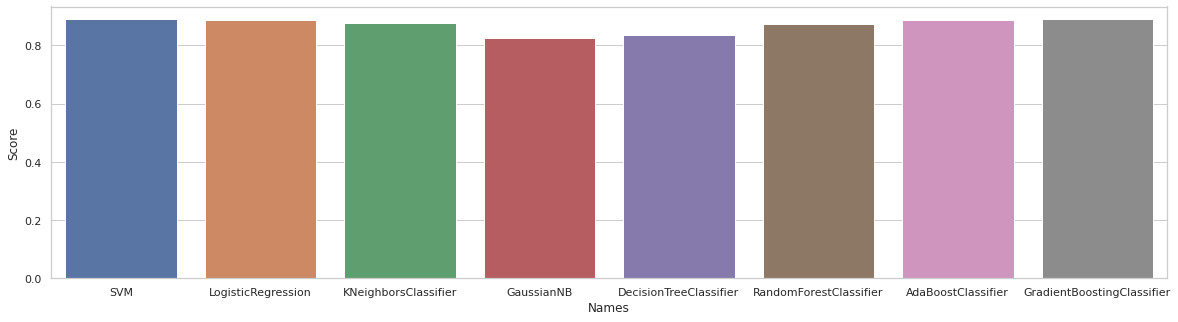

In [190]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(x='Names',y = 'Score',data = df1)

In [212]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_SVM = classification_report(y_test,y_predicted_SVM)
print(report_SVM)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    143241
           1       0.90      0.88      0.89    143566

    accuracy                           0.89    286807
   macro avg       0.89      0.89      0.89    286807
weighted avg       0.89      0.89      0.89    286807



In [213]:
roc_auc_score(y_test,y_predicted_SVM)

0.8892656513958056

In [216]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted_SVM)
auc = auc(fpr,tpr)

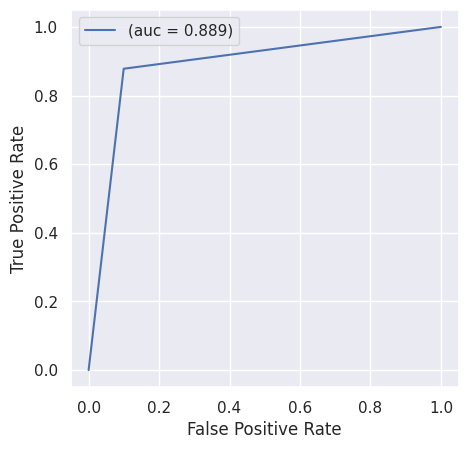

In [217]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()